# Kernel methods for biological sequence classification

MVA 2019 - Kernel methods for machine learning

*Éloïse Berthier, Guillaume Dalle, Clément Mantoux*

In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
import numpy as np
import tqdm

In [90]:
import backend
from kernels import LinearKernel, GaussianKernel

In [98]:
datasets = []
for k in [0, 1, 2]:
    Xtr, Ytr = backend.read_data_mat(dataset="tr" + str(k), suffix="translated")
    Xte = backend.read_data_mat("te" + str(k), suffix="translated")
    datasets.append([Xtr, Ytr, Xte])

In [107]:
lambd_range = np.logspace(-4, 0., 8) #np.linspace(.01, .2, 4)#np.logspace(-1.5, 3, 4)##
kernel = LinearKernel()
kfold = 3

Testing lambda for dataset 1: 100%|██████████| 8/8 [00:12<00:00,  1.56s/it]


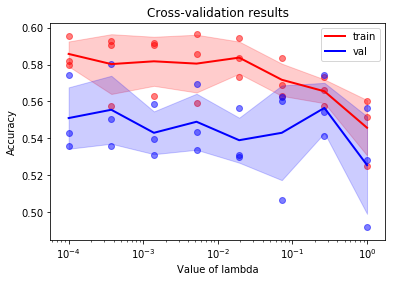

Testing lambda for dataset 2:   0%|          | 0/8 [00:00<?, ?it/s]

best:  0.5564987776382079


Testing lambda for dataset 2: 100%|██████████| 8/8 [00:12<00:00,  1.51s/it]


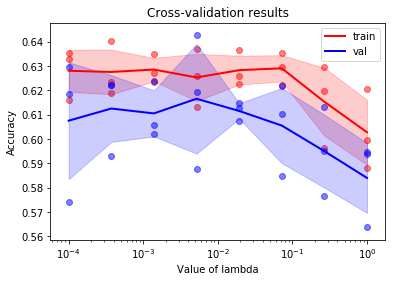

Testing lambda for dataset 3:   0%|          | 0/8 [00:00<?, ?it/s]

best:  0.6165130647889269


Testing lambda for dataset 3: 100%|██████████| 8/8 [00:13<00:00,  1.60s/it]


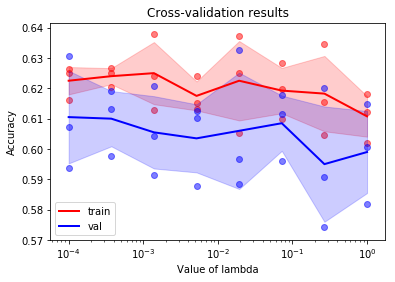

best:  0.6105100602851727


In [108]:
acc_train = np.empty((3, len(lambd_range), kfold))
acc_val = np.empty((3, len(lambd_range), kfold))
best_lambd = np.empty(3)

for d, data in enumerate(datasets):
    Xtr, Ytr, _ = data
    for i in tqdm.trange(len(lambd_range), desc="Testing lambda for dataset {}".format(d+1)):
        lambd = lambd_range[i]
        acc_train[d, i], acc_val[d, i] = backend.cross_validate(
            Xtr, Ytr,
            kernel, lambd,
            method="svm", kfold=kfold
        )
    backend.plot_CV_results(acc_train[d], acc_val[d], lambd_range, "lambda")
    
    best_lambd[d] = lambd_range[np.argmax(np.mean(acc_val[d], axis=1))]
    print('best: ', np.max(np.mean(acc_val[d], axis=1)))

In [86]:
backend.final_prediction(datasets, [kernel]*3, best_lambd)

DATASET 1
DATASET 2
DATASET 3


*Crossvalidation Accuracy for Spectrum Kernels: best and most robust is exact spectr6 on all datasets.*

| Dataset | spectr3 | spectr4 | spectr5 | spectr6 | spectr3h1 | spectr4h1 | spectr5h1 | spectr6+spectr5h1 | spectr6+spectr3h1 | spectr6h1 | translate3 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | 0.585 | 0.598 | 0.602 | **0.620** | 0.598 |  0.596 | 0.597 | 0.613 | 0.623 | 0.616 | 0.556 |
| 2 | 0.624 | 0.653 | 0.685 | **0.710** | 0.633 | 0.647  | 0.678 | 0.676 | 0.715 | 0.700 | 0.616 | 
| 3 | 0.612 | 0.614 | 0.611 | **0.635** | 0.607 | 0.613  | 0.619 | 0.616 | 0.635 | 0.630 | 0.610 |